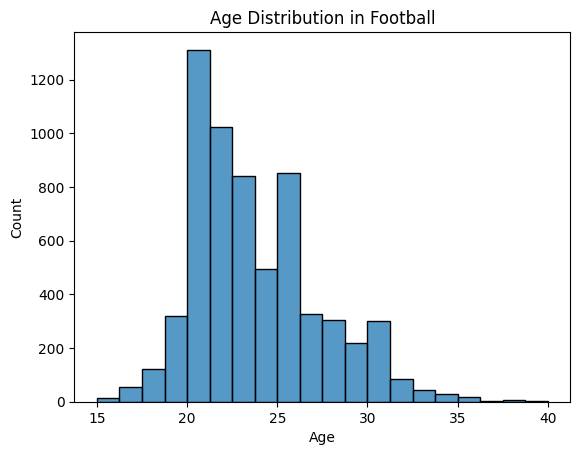

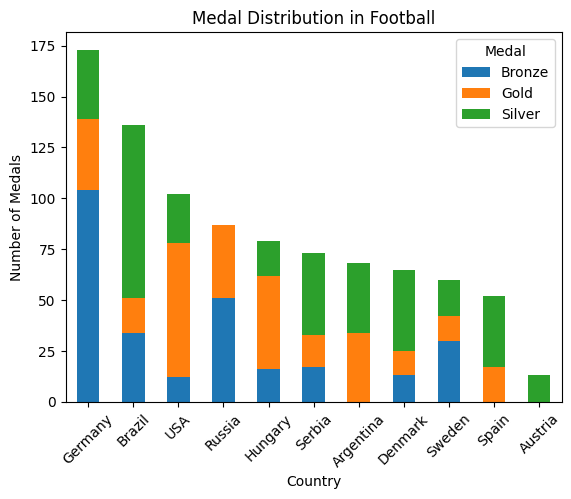

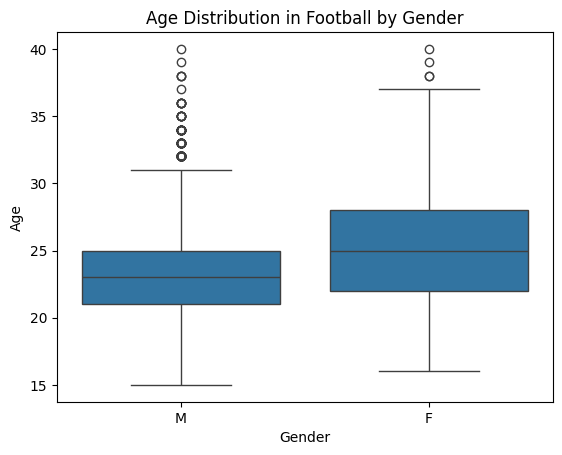

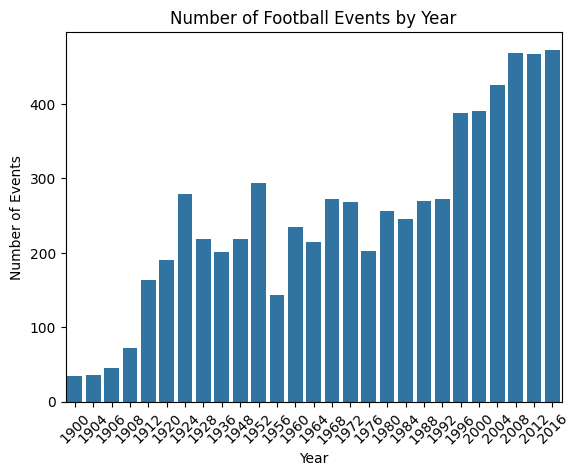

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


noc_region_df = pd.read_csv('../data/noc_regions.csv')
athlete_events_df = pd.read_csv('../data/athlete_events.csv')

merged_df = pd.merge(athlete_events_df, noc_region_df, how='inner', on='NOC')

# Plot the age distribution histogram
def plot_age_distribution(sport_df, sport_name):
    sns.histplot(sport_df['Age'].dropna(), bins=20)
    plt.title(f'Age Distribution in {sport_name}')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()
 
 
# Medal distribution between countries
def plot_medal_distribution(sport_df, sport_name):
    medal_distribution = sport_df.groupby(['region', 'Medal']).size().unstack(fill_value=0)
    medal_distribution["Total"] = medal_distribution.sum(axis=1)
    top10 = medal_distribution.sort_values("Total", ascending=False).head(10)
    austria = medal_distribution[medal_distribution.index == "Austria"]
    filtered = pd.concat([top10, austria]).drop_duplicates()
    filtered = filtered.drop(columns=["Total"])
    filtered.plot(kind='bar', stacked=True, title=f'Medal Distribution in {sport_name}')
    plt.xlabel('Country')
    plt.ylabel('Number of Medals')
    plt.xticks(rotation=45)
    plt.show()

 
 
# Plot age distribution by gender
def plot_age_by_gender(sport_df, sport_name):
    sns.boxplot(x='Sex', y='Age', data=sport_df)
    plt.title(f'Age Distribution in {sport_name} by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Age')
    plt.show()
 
 
# Plot number of events per year
def plot_events_by_year(sport_df, sport_name):
    sns.countplot(x='Year', data=sport_df)
    plt.title(f'Number of {sport_name} Events by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Events')
    plt.xticks(rotation=45)
    plt.show()
 
 
# Run full sport analysis
def analyze_sport(merged_df, sport='Football'):
    sport_df = merged_df[merged_df['Sport'] == sport].copy()
 
    plot_age_distribution(sport_df, sport)
    plot_medal_distribution(sport_df, sport)
    plot_age_by_gender(sport_df, sport)
    plot_events_by_year(sport_df, sport)
 
 
analyze_sport(merged_df, sport="Football")